In [1]:
import tqdm
import numpy as np

import torch
from mnist_loader import MNISTDataset, train_test_split
from autoencoders import SimpleEncoder, SimpleDecoder, Autoencoder

from torchvision import transforms

import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
torch.random.manual_seed(42)

In [ ]:
mnist = datasets.MNIST('/home/andrei/datasets') 
# use data and targets only, supports __getitem__, 60000 images 28x28 px

In [ ]:
train, test, representations, labels = train_test_split(train_ratio=0.8, mnist)

In [ ]:
image_transforms = transforms.ToTensor()
trainset = MNISTDataset(train, mnist, image_transforms)
testset = MNISTDataset(test, mnist, image_transforms)

In [6]:
trainloader = DataLoader(trainset, shuffle=True, batch_size=128, num_workers=2)
testloader = DataLoader(testset, shuffle=False, batch_size=128, num_workers=2)

In [9]:
encoder = SimpleEncoder(num_features=40)
decoder = SimpleDecoder(num_features=40)

model = AutoEncoder(encoder, decoder)

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
loss_fn = torch.nn.BCELoss()

/home/andrei/miniconda3/lib/python3.9/site-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


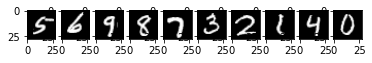

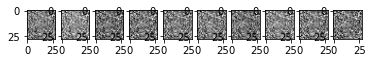

 Epoch 0, train loss: 105.16061010956764, test loss: 74.45062139630318


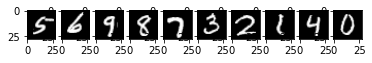

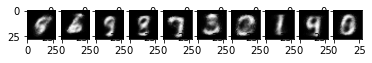

 Epoch 1, train loss: 66.46501879394054, test loss: 59.97204960882664


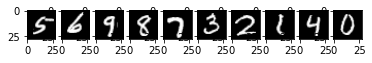

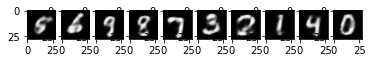

 Epoch 2, train loss: 55.70094840973616, test loss: 52.05135536193848


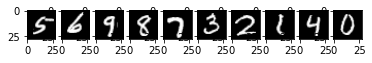

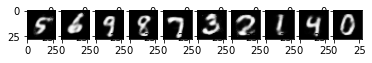

 Epoch 3, train loss: 49.96635351330042, test loss: 48.18761435896158


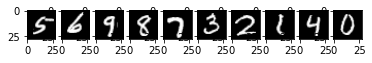

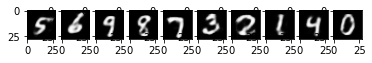

 Epoch 4, train loss: 47.06371699273586, test loss: 46.058512054383755


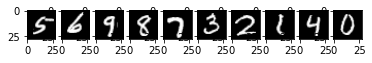

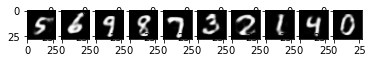

 Epoch 5, train loss: 45.49630133062601, test loss: 44.93850418180227


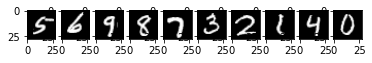

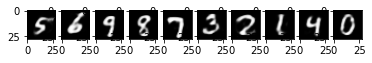

 Epoch 6, train loss: 44.68522297590971, test loss: 44.399045057594776


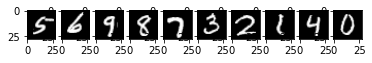

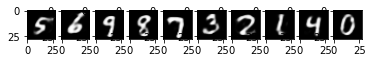

 Epoch 7, train loss: 44.271336153149605, test loss: 44.053873896598816


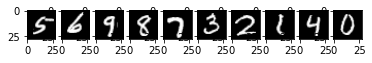

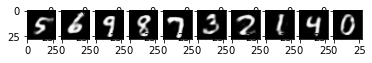

 Epoch 8, train loss: 43.79957119375467, test loss: 43.17917414754629


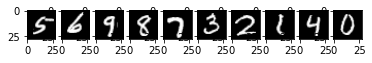

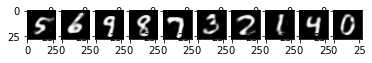

 Epoch 9, train loss: 43.09377905726433, test loss: 42.94375587999821


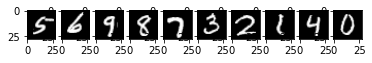

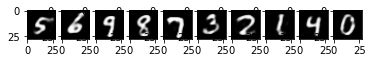

 Epoch 10, train loss: 42.937612526118755, test loss: 42.83533999323845


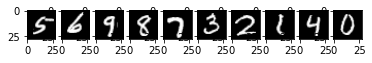

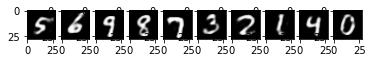

 Epoch 11, train loss: 42.84369746595621, test loss: 42.77520027756691


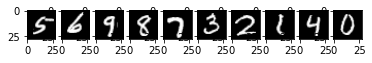

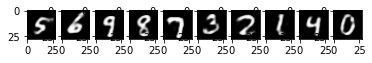

 Epoch 12, train loss: 42.781293883919716, test loss: 42.68362208455801


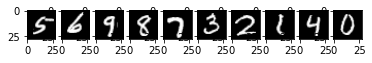

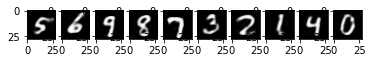

 Epoch 13, train loss: 42.72418337315321, test loss: 42.65763661265373


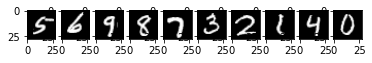

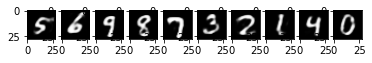

 Epoch 14, train loss: 42.68245020508766, test loss: 42.6269176825881


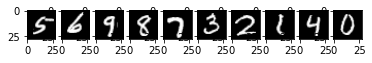

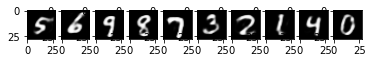

 Epoch 15, train loss: 42.639800883829594, test loss: 42.587889425456524


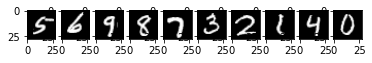

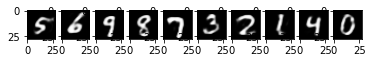

 Epoch 16, train loss: 42.615411810576916, test loss: 42.581795893609524


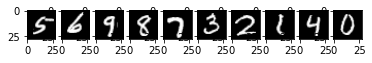

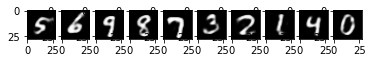

 Epoch 17, train loss: 42.58370750397444, test loss: 42.54843243211508


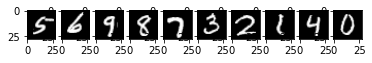

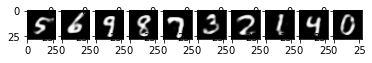

 Epoch 18, train loss: 42.567617788910866, test loss: 42.509947411715984


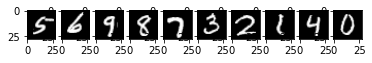

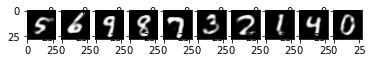

 Epoch 19, train loss: 42.53896586596966, test loss: 42.454371839761734


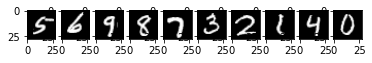

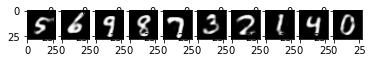

 Epoch 20, train loss: 42.5223403647542, test loss: 42.440842509269714


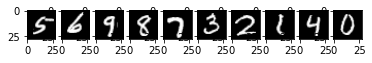

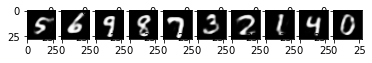

 Epoch 21, train loss: 42.4988064840436, test loss: 42.43280027061701


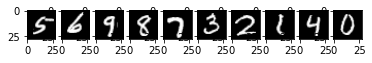

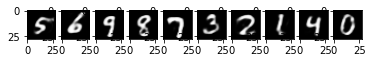

 Epoch 22, train loss: 42.48018193244934, test loss: 42.46096307039261


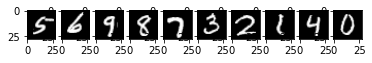

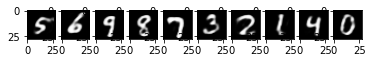

 Epoch 23, train loss: 42.469932571053505, test loss: 42.394852593541145


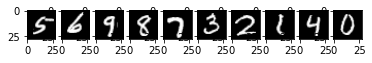

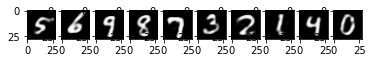

 Epoch 24, train loss: 42.45101135224104, test loss: 42.416517183184624


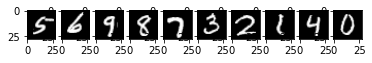

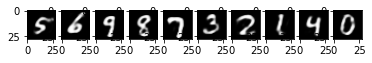

 Epoch 25, train loss: 42.441172547638416, test loss: 42.346580900251865


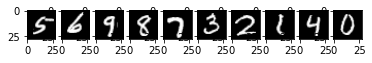

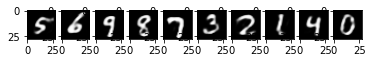

 Epoch 26, train loss: 42.421005330979824, test loss: 42.36833117157221


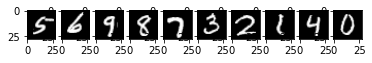

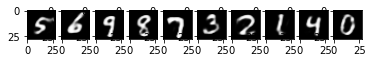

 Epoch 27, train loss: 42.41014016419649, test loss: 42.32380922883749


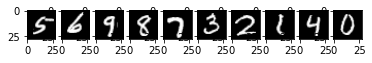

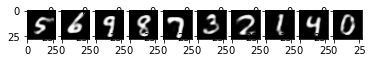

 Epoch 28, train loss: 42.39932378381491, test loss: 42.332216806709766


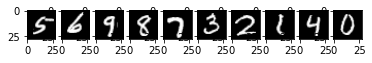

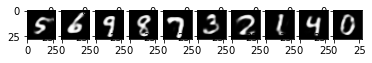

 Epoch 29, train loss: 42.3824645280838, test loss: 42.32552893459797


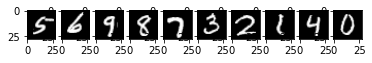

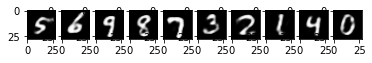

 Epoch 30, train loss: 42.382698968052864, test loss: 42.31695597618818


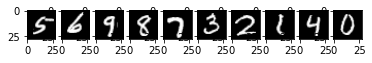

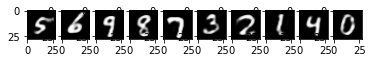

 Epoch 31, train loss: 42.3622929379344, test loss: 42.34046754986048


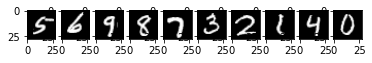

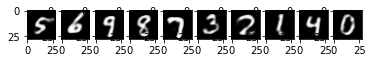

 Epoch 32, train loss: 42.34811295568943, test loss: 42.32754808664322


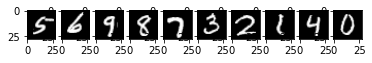

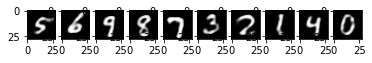

 Epoch 33, train loss: 42.34196638315916, test loss: 42.28384516388178


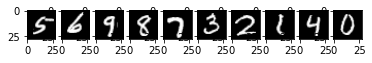

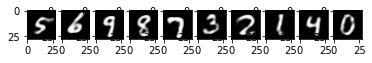

 Epoch 34, train loss: 42.33414079993963, test loss: 42.298770010471344


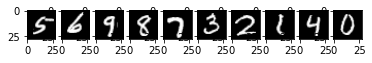

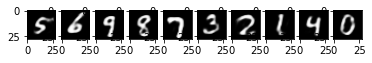

 Epoch 35, train loss: 42.324057191610336, test loss: 42.273275919258595


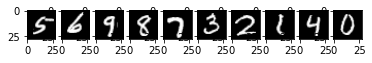

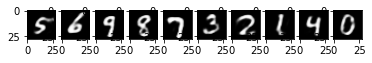

 Epoch 36, train loss: 42.31442252546549, test loss: 42.26586936414242


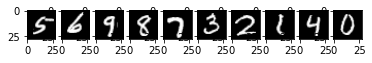

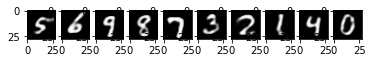

 Epoch 37, train loss: 42.304480507969856, test loss: 42.24629870057106


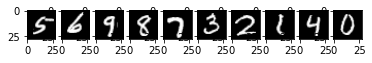

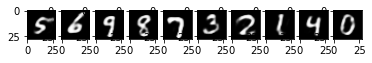

 Epoch 38, train loss: 42.29487436264753, test loss: 42.24216524511576


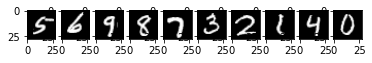

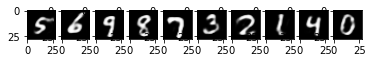

 Epoch 39, train loss: 42.28833466768265, test loss: 42.21295368671417


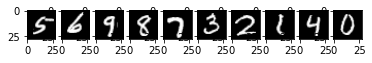

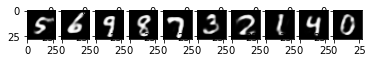

 Epoch 40, train loss: 42.27524945884943, test loss: 42.22522658109665


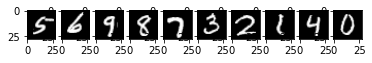

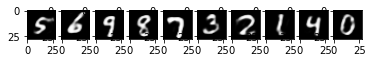

 Epoch 41, train loss: 42.2709292024374, test loss: 42.223834082484245


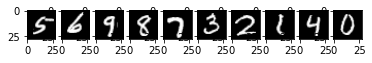

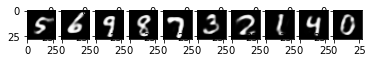

 Epoch 42, train loss: 42.262628480792046, test loss: 42.225948855280876


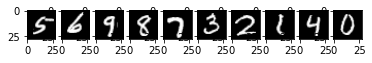

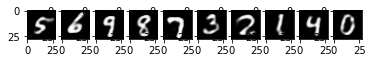

 Epoch 43, train loss: 42.25694032013416, test loss: 42.17053250968456


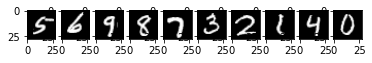

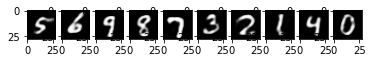

 Epoch 44, train loss: 42.25252438336611, test loss: 42.19711820036173


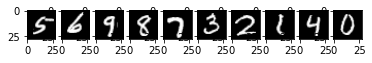

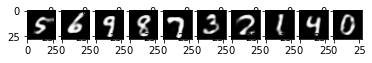

 Epoch 45, train loss: 42.24312066286802, test loss: 42.20701149851084


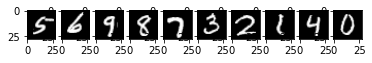

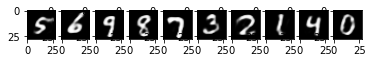

 Epoch 46, train loss: 42.235578678548336, test loss: 42.16256174445152


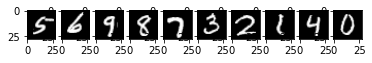

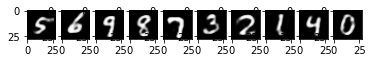

 Epoch 47, train loss: 42.228989750146866, test loss: 42.18375542014837


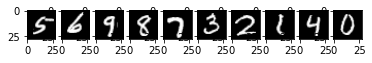

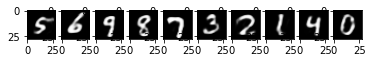

 Epoch 48, train loss: 42.222694113850594, test loss: 42.173147194087505


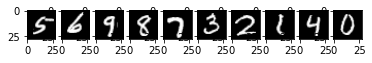

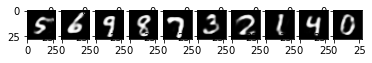

 Epoch 49, train loss: 42.218112267553806, test loss: 42.13641442358494


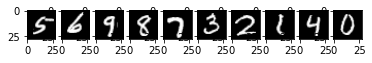

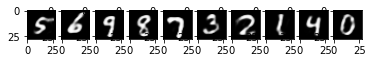

 Epoch 50, train loss: 42.20816791057587, test loss: 42.155580796301365


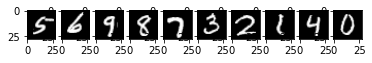

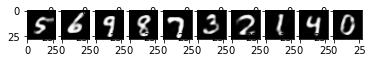

 Epoch 51, train loss: 42.20485645532608, test loss: 42.13358425348997


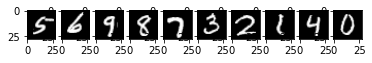

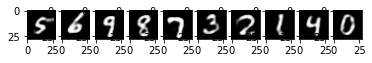

 Epoch 52, train loss: 42.19332677125931, test loss: 42.1211271956563


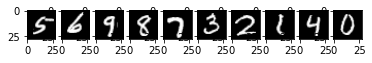

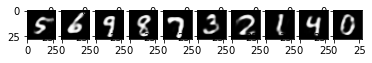

 Epoch 53, train loss: 42.189584508538246, test loss: 42.11426566541195


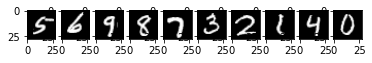

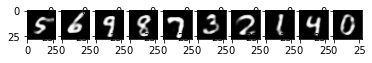

 Epoch 54, train loss: 42.18763469159603, test loss: 42.15246248990297


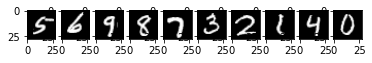

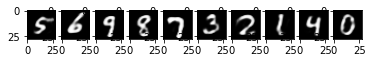

 Epoch 55, train loss: 42.18370535969734, test loss: 42.10389792919159


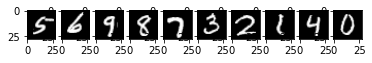

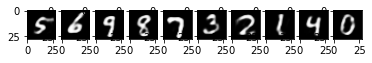

 Epoch 56, train loss: 42.17847119271755, test loss: 42.1286693662405


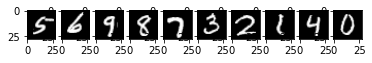

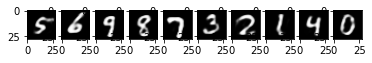

 Epoch 57, train loss: 42.17200319468975, test loss: 42.11884716153145


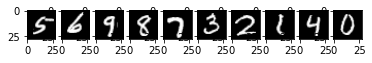

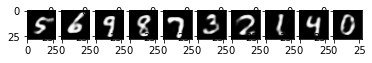

 Epoch 58, train loss: 42.16941802203655, test loss: 42.12069511413574


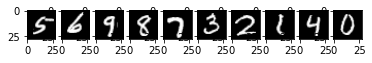

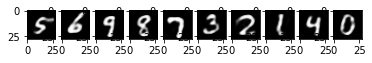

 Epoch 59, train loss: 42.16550958901644, test loss: 42.12015354633331


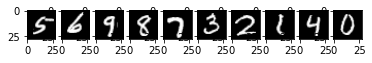

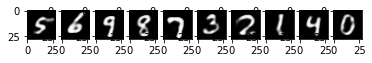

In [ ]:
test_model(representations, model, image_transforms, mnist)
model, optimizer, test_loss = train_test_model(model, optimizer, loss_fn, testloader, "test")
print(f"test loss: {test_loss}")
train_losses = []
test_losses = []
for epoch in range(100):
    model, optimizer, train_loss = train_test_model(model, optimizer, loss_fn, trainloader, "train")
    model, optimizer, test_loss = train_test_model(model, optimizer, loss_fn, testloader, "test")
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    print(f" Epoch {epoch}, train loss: {train_loss}, test loss: {test_loss}")
    test_model(representations, model, image_transforms, mnist)